In [330]:
import pandas as pd
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np
import sys 
sys.path.insert(1, "../")
from workloads.util import use_results, use_dataset, read_config, log_dataset

import seaborn as sns
sns.set_theme(style="whitegrid")

In [331]:
experiment = "ml-1m"
dataset_dir = use_dataset(experiment)
result_dir = use_results(experiment, download=False)

/data/wooders/ralf-vldb//datasets/ml-1m


In [332]:
updates_per_ts = [1, 2, 4]
ts_factor = [10, 100] #, 1000]
policies = ["total_error", "total_error_cold", "max_pending", "min_past", "round_robin", "last_query"]

In [447]:
updates_df = pd.DataFrame()
df_all = pd.DataFrame()
results = [] 

for p in policies: 
    for u in updates_per_ts: 
        for t in ts_factor: 
            update_df = pd.read_csv(f"{result_dir}/{p}_{u}_{t}_updates.csv")
            df = pd.read_csv(f"{result_dir}/{p}_{u}_{t}_results.csv")
            df["policy"] = p
            df["updates"] = u 
            df["ts_factor"] = t
            update_df["updates"] = u 
            update_df["ts_factor"] = t
            
            # threshold predictions 
            df["y_pred"][df["y_pred"] > 5] = 5
            df["y_pred"][df["y_pred"] < 1] = 1

            error = mean_squared_error(df.y_pred, df.y_true)

            total_updates = len(update_df.index)
            results.append([u , p, error, total_updates, t])
            updates_df = pd.concat([updates_df, update_df])
            df_all = pd.concat([df_all, df])
      
results_df = pd.DataFrame(results, columns=["updates", "policy", "error", "total_updates", "ts_factor"])
results_df

/tmp/ipykernel_2322980/3764866309.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["y_pred"][df["y_pred"] > 5] = 5
/tmp/ipykernel_2322980/3764866309.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["y_pred"][df["y_pred"] < 1] = 1
/tmp/ipykernel_2322980/3764866309.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["y_pred"][df["y_pred"] > 5] = 5
/tmp/ipykernel_2322980/3764866309.py:18: SettingWithCopyWarning: 
A value

/tmp/ipykernel_2322980/3764866309.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["y_pred"][df["y_pred"] > 5] = 5
/tmp/ipykernel_2322980/3764866309.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["y_pred"][df["y_pred"] < 1] = 1
/tmp/ipykernel_2322980/3764866309.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["y_pred"][df["y_pred"] > 5] = 5
/tmp/ipykernel_2322980/3764866309.py:18: SettingWithCopyWarning: 
A value

/tmp/ipykernel_2322980/3764866309.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["y_pred"][df["y_pred"] > 5] = 5
/tmp/ipykernel_2322980/3764866309.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["y_pred"][df["y_pred"] < 1] = 1
/tmp/ipykernel_2322980/3764866309.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["y_pred"][df["y_pred"] > 5] = 5
/tmp/ipykernel_2322980/3764866309.py:18: SettingWithCopyWarning: 
A value

,updates,policy,error,total_updates,ts_factor
0,1,total_error,1.126378,270020,10
1,1,total_error,1.480915,89396,100
2,2,total_error,1.120283,322673,10
3,2,total_error,1.281605,117557,100
4,4,total_error,1.119497,339250,10
5,4,total_error,1.204448,135767,100
6,1,total_error_cold,1.119605,270020,10
7,1,total_error_cold,1.267329,89396,100
8,2,total_error_cold,1.119478,322668,10
9,2,total_error_cold,1.182436,117540,100


,Unnamed: 0,policy,runtime,key,i,time
0,0,total_error,1.00,4269,0,0
1,1,total_error,1.00,4269,1,2
2,2,total_error,1.00,4269,2,4
3,3,total_error,1.00,4269,3,8
4,4,total_error,1.00,4269,4,10
...,...,...,...,...,...,...
136203,136203,last_query,0.25,5950,8,810664
136204,136204,last_query,0.25,5950,9,810668
136205,136205,last_query,0.25,5950,10,810670
136206,136206,last_query,0.25,5950,11,810671


    updates                policy     error  total_updates  ts_factor
6         1    Accuracy Optimized  1.119605         270020         10
8         2    Accuracy Optimized  1.119478         322668         10
10        4    Accuracy Optimized  1.119476         339250         10
18        1  Minimum Past Updates  1.120203         270020         10
20        2  Minimum Past Updates  1.119485         322532         10
22        4  Minimum Past Updates  1.119477         339223         10


/tmp/ipykernel_2322980/1598417380.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_df.policy = plot_df.policy.map({


[Text(0.5, 1.0, 'Prediction Accuracy per Policy (Recommendation)'),
 Text(0.5, 0, 'Updates per Timestep'),
 Text(0, 0.5, 'MSE')]

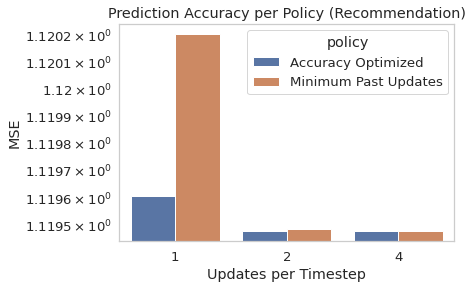

In [504]:
plot_df = results_df[(results_df["ts_factor"] == 10) & (results_df.policy.isin(["total_error_cold", "min_past", "round_robin", "max_pending", "last_query"]))]
plot_df.policy = plot_df.policy.map({
    'total_error_cold': 'Accuracy Optimized', 
    'min_past': 'Minimum Past Updates', 
    #'round_robin': "Round-Robin", 
    #'max_pending': "Maximum Pending Updates", 
    #'last_query': "Read-Optimized"
})
plot_df = plot_df[plot_df["updates"] <=4].dropna()
print(plot_df)
#sns.set(rc={'figure.figsize':(10.7,5.27)})
sns.set_theme(style="whitegrid", font_scale=1.2)

g = sns.barplot(x="updates", y="error", hue="policy", data=plot_df, log=True)
g.set(title="Prediction Accuracy per Policy (Recommendation)", xlabel="Updates per Timestep",  ylabel="MSE")
#plt.legend(np.flip(plot_df['policy'].unique()), loc='upper right', title="Event Type")

In [ ]:
ax = sns.barplot(x="updates", y="error", hue="policy", data=results_df[results_df["ts_factor"] == 10])

In [ ]:
runtime = 1.0
sns.set(rc={'figure.figsize':(10.7,5.27)})
hist_df = updates_df[updates_df["runtime"] == runtime].groupby(by=["key", "policy"]).size()
hist_df = hist_df.to_frame(name="updates").reset_index()
hist_df["policy"] = hist_df.policy.map({'total_error': 'Accuracy Optimized', 'min_past': 'Minimum Past Updates'})

sns.set_theme(style="whitegrid", font_scale=1.5)
g = sns.histplot(data=hist_df, x="updates", hue="policy", log_scale=(False, True), discrete=True)
g.set(title="Distribution of Updates Across Keys", xlabel="Scheduled Updates per Key",  ylabel="Number Keys")

In [ ]:
updates_df[(updates_df["policy"] == "total_error") & (updates_df["runtime"] == 1.00)]

# Plot Dataset

In [383]:
factor = 10

In [384]:
test_df = pd.read_csv(f'{dataset_dir}/stream.csv')
train_df = pd.read_csv(f'{dataset_dir}/train.csv')
start_ts = test_df.timestamp.min()
past_updates = pickle.load(open(f"{result_dir}/past_updates.pkl", "rb"))
test_df.timestamp = test_df.timestamp.apply(lambda ts: int((ts - start_ts)/factor))

In [385]:
new_user_df = test_df[test_df.user_id.isin(past_updates.keys())]
old_user_df = test_df[~test_df.user_id.isin(past_updates.keys())]

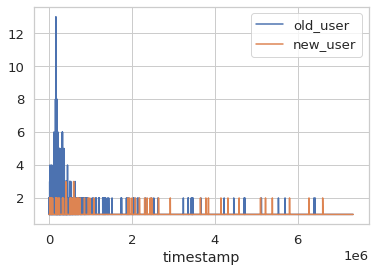

In [386]:
old_user_df.groupby(by="timestamp").user_id.nunique().plot(label="old_user").legend()
new_user_df.groupby(by="timestamp").user_id.nunique().plot(label="new_user").legend()

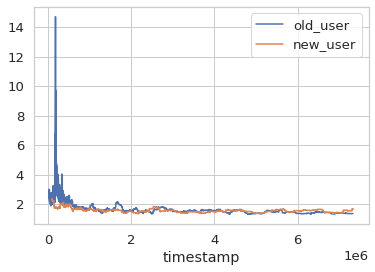

In [387]:
old_user_df.groupby(by="timestamp").rating.count().rolling(1000).mean().plot(label="old_user")
new_user_df.groupby(by="timestamp").rating.count().rolling(1000).mean().plot(label="new_user").legend()

<AxesSubplot:xlabel='timestamp'>

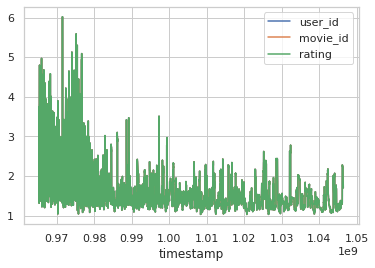

In [328]:
test_df.groupby(by="timestamp").count().rolling(window=100).mean().plot()

In [ ]:
train_df.movie_id.value_counts()

In [ ]:
test_df.movie_id.value_counts()

# Results Over Time 

In [ ]:
results[0]

/tmp/ipykernel_2322980/1755252222.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["square_error"] = df.y_pred - df.y_true
/tmp/ipykernel_2322980/1755252222.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["square_error"] = df["square_error"].apply(lambda x: x*x)


1.27143829318413


/tmp/ipykernel_2322980/1755252222.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["square_error"] = df.y_pred - df.y_true
/tmp/ipykernel_2322980/1755252222.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["square_error"] = df["square_error"].apply(lambda x: x*x)


1.2673293632690776


,Unnamed: 0,y_true,y_pred,user_id,movie_id,timestamp,policy,updates,ts_factor,square_error
0,0,4,3.990729,4268,1198,0,total_error_cold,1,100,0.000086
1,1,3,4.165281,4268,858,0,total_error_cold,1,100,1.357879
2,2,4,2.750467,4269,588,0,total_error_cold,1,100,1.561334
3,3,4,5.000000,4269,1441,0,total_error_cold,1,100,1.000000
4,4,3,1.935438,4269,3099,0,total_error_cold,1,100,1.133293
...,...,...,...,...,...,...,...,...,...,...
735115,735115,1,2.997377,4958,2399,811517,total_error_cold,1,100,3.989517
735116,735116,5,3.673028,4958,1407,811518,total_error_cold,1,100,1.760855
735117,735117,4,2.525622,4958,1924,811519,total_error_cold,1,100,2.173791
735118,735118,4,3.384733,4958,3264,811519,total_error_cold,1,100,0.378553


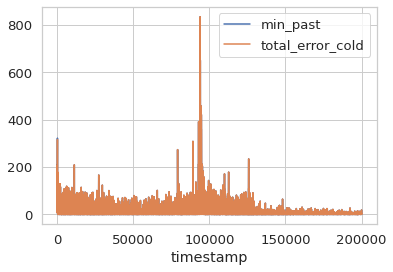

In [414]:
x0 = 0 #190000#test_df.timestamp.min()
x1 = 200000 #test_df.timestamp.max()

p = "min_past"
u = 1
t = 100
df = df_all[(df_all["policy"] == p) & (df_all["ts_factor"] == t) & (df_all["updates"] == u)]
df["square_error"] = df.y_pred - df.y_true
df["square_error"] = df["square_error"].apply(lambda x: x*x)
print(df.square_error.mean())
df[(df["timestamp"] < x1) & (df["timestamp"] > x0)].groupby(by="timestamp").square_error.sum().plot(label=p) #rolling(1000).mean().plot(xlim=(x0, x1), label=p)
min_past_df = df

p = "total_error_cold"
df = df_all[(df_all["policy"] == p) & (df_all["ts_factor"] == t) & (df_all["updates"] == u)]
df["square_error"] = df.y_pred - df.y_true
df["square_error"] = df["square_error"].apply(lambda x: x*x)
print(df.square_error.mean())
df[(df["timestamp"] < x1) & (df["timestamp"] > x0)].groupby(by="timestamp").square_error.sum().plot(label=p).legend() #rolling(1000).mean().plot(xlim=(x0, x1), label=p)
total_error_df = df
#p = "total_error"
#df = df_all[(df_all["policy"] == p) & (df_all["ts_factor"] == t) & (df_all["updates"] == u)]
#df["square_error"] = df.y_pred - df.y_true
#df["square_error"] = df["square_error"].apply(lambda x: x*x)
#df[(df["timestamp"] < x1) & (df["timestamp"] > x0) ].groupby(by="timestamp").square_error.sum().rolling(100).mean().plot(label=p).legend() #rolling(1000).mean().plot(xlim=(x0, x1), label=p)


df

In [415]:
min_past_df

,Unnamed: 0,y_true,y_pred,user_id,movie_id,timestamp,policy,updates,ts_factor,square_error
0,0,4,3.990729,4268,1198,0,min_past,1,100,0.000086
1,1,3,4.165281,4268,858,0,min_past,1,100,1.357879
2,2,4,2.750467,4269,588,0,min_past,1,100,1.561334
3,3,4,5.000000,4269,1441,0,min_past,1,100,1.000000
4,4,3,1.935438,4269,3099,0,min_past,1,100,1.133293
...,...,...,...,...,...,...,...,...,...,...
735115,735115,1,2.997377,4958,2399,811517,min_past,1,100,3.989517
735116,735116,5,3.673028,4958,1407,811518,min_past,1,100,1.760855
735117,735117,4,2.525622,4958,1924,811519,min_past,1,100,2.173791
735118,735118,4,3.384733,4958,3264,811519,min_past,1,100,0.378553


In [418]:
diff_df = pd.concat([total_error_df, min_past_df]).drop_duplicates(keep=False, subset=["timestamp", "user_id", "movie_id", "square_error"])

In [431]:
diff_df.groupby(by=["user_id"]).square_error.sum()

user_id
1        24.007399
2       121.406930
3        22.949227
5       173.427297
6        28.832483
           ...    
5978    260.952755
5985      2.539844
5991      0.215681
5996    171.297642
6002     32.530582
Name: square_error, Length: 3849, dtype: float64

In [478]:
update_table = updates_df[(updates_df["ts_factor"] == t) & (updates_df["updates"] == u)]\
                            .groupby(by=["key", "policy"])\
                            .time.apply(np.array)
                            
update_table

key   policy          
1     last_query          [129973, 129974, 129975, 129976, 129980, 12998...
      max_pending         [129973, 129974, 129975, 129976, 129980, 12998...
      min_past            [129973, 129974, 129975, 129976, 129980, 12998...
      round_robin         [129973, 129974, 129975, 129976, 129980, 12998...
      total_error         [129973, 129974, 129975, 129976, 129980, 12998...
                                                ...                        
6040  max_pending         [188930, 321511, 321512, 321513, 321514, 32151...
      min_past            [188930, 321511, 321512, 321513, 321514, 32151...
      round_robin         [188930, 321511, 321512, 321513, 321514, 32151...
      total_error         [188930, 321511, 321512, 321513, 321514, 32151...
      total_error_cold    [188930, 321511, 321512, 321513, 321514, 32151...
Name: time, Length: 28212, dtype: object

In [479]:
update_table.loc[1].loc["last_query"]

array([129973, 129974, 129975, 129976, 129980, 129981, 129987, 129989,
       129990, 129991, 129993, 129994, 129995, 129996, 135215, 135216,
       135217])

In [490]:
df = df_all[(df_all["ts_factor"] == t) & (df_all["updates"] == u)]
df["square_error"] = df.y_pred - df.y_true
df["square_error"] = df["square_error"].apply(lambda x: x*x)
df.square_error.max()

/tmp/ipykernel_2322980/1454398426.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["square_error"] = df.y_pred - df.y_true
/tmp/ipykernel_2322980/1454398426.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["square_error"] = df["square_error"].apply(lambda x: x*x)


16.0

In [495]:
df.groupby(by="policy").square_error.mean()

policy
last_query          1.990268
max_pending         1.329973
min_past            1.177049
round_robin         1.354952
total_error         1.204448
total_error_cold    1.176824
Name: square_error, dtype: float64

In [496]:
df[~df.user_id.isin(past_updates.keys())].groupby(by="policy").square_error.mean()

policy
last_query          2.445971
max_pending         1.426234
min_past            1.180859
round_robin         1.465606
total_error         1.226302
total_error_cold    1.180839
Name: square_error, dtype: float64

In [497]:
df[df.user_id.isin(past_updates.keys())].groupby(by="policy").square_error.mean()

policy
last_query          1.302786
max_pending         1.184751
min_past            1.171301
round_robin         1.188017
total_error         1.171478
total_error_cold    1.170767
Name: square_error, dtype: float64

In [506]:
df.groupby(by="user_id").y_true.count()

user_id
1        312
2        768
3        300
4        126
5       1188
        ... 
6001     180
6002     978
6016     312
6028       6
6040     138
Name: y_true, Length: 4702, dtype: int64

In [488]:
for user_id, group in df.groupby(by=["user_id"]):
    #print(group)
    te = group[group["policy"] == "total_error_cold"].square_error.sum()
    mp = group[group["policy"] == "min_past"].square_error.sum()
    if te > mp*1.1: 
        print(user_id, past_updates[user_id], te, mp)
        print("    total_error", update_table.loc[user_id].loc["total_error_cold"].mean(), update_table.loc[user_id].loc["total_error_cold"].shape)
        print("    min_past", update_table.loc[user_id].loc["min_past"].mean(), update_table.loc[user_id].loc["min_past"].shape)

4315 155 30.564712951630167 23.32621349283489
    total_error 3365.4 (5,)
    min_past 1691.4 (10,)
4911 81 10.517917863426224 2.298363278260674
    total_error 7955.0 (1,)
    min_past 7954.5 (2,)


In [489]:
for user_id, group in diff_df.groupby(by=["user_id"]):
    #print(group)
    te = group[group["policy"] == "total_error_cold"].square_error.sum()
    mp = group[group["policy"] == "min_past"].square_error.sum()
    if te*1.1 < mp: 
        print(user_id, past_updates[user_id] if user_id in past_updates else False, te, mp)
        print("    total_error", update_table.loc[user_id].loc["total_error_cold"].mean(), update_table.loc[user_id].loc["total_error_cold"].shape)
        print("    min_past", update_table.loc[user_id].loc["min_past"].mean(), update_table.loc[user_id].loc["min_past"].shape)

1440 False 0.00018333780036350095 0.0002279791221317936
    total_error 94619.375 (8,)
    min_past 94578.16666666667 (6,)
4269 227 97.5863785054677 260.00145174914826
    total_error 5.0 (11,)
    min_past 4.6 (10,)
4271 526 555.127301697683 1318.6013106748499
    total_error 34.35897435897436 (39,)
    min_past 22.923076923076923 (13,)
4274 153 15.212738366662265 48.101048092043875
    total_error 14.0 (8,)
    min_past 15.0 (12,)
4298 285 216.93841617765224 302.5222019785573
    total_error 1883.8333333333333 (30,)
    min_past 1677.6785714285713 (28,)
4302 233 66.31551004979265 110.17385836547352
    total_error 145346.1379310345 (29,)
    min_past 145346.1379310345 (29,)
4310 266 108.58889048926545 119.47167410842088
    total_error 134610.79411764705 (34,)
    min_past 130778.42857142857 (35,)
4315 155 9.239932277829727 16.826887618467474
    total_error 3365.4 (5,)
    min_past 1691.4 (10,)
4335 484 78.26652562709009 200.08717137836925
    total_error 2038.439024390244 (41,)
   

In [ ]:
x0 = test_df.timestamp.min()
x1 = test_df.timestamp.max()

p = "max_pending"
u = 1
t = 100
df = pd.read_csv(f"{result_dir}/{p}_{u}_{t}_results.csv")
df["square_error"] = df.y_pred - df.y_true
df["square_error"] = df["square_error"].apply(lambda x: x*x)
#df.groupby(by="timestamp").square_error.mean().rolling(1000).mean().plot(xlim=(x0, x1))

p = "total_error_cold"
df = pd.read_csv(f"{result_dir}/{p}_{u}_{t}_results.csv")
df["square_error"] = df.y_pred - df.y_true
df["square_error"] = df["square_error"].apply(lambda x: x*x)
df.groupby(by="timestamp").square_error.mean().expanding().sum().plot(xlim=(x0, x1), label=p)


p = "min_past"
df = pd.read_csv(f"{result_dir}/{p}_{u}_{t}_results.csv")
df["square_error"] = df.y_pred - df.y_true
df["square_error"] = df["square_error"].apply(lambda x: x*x)
df.groupby(by="timestamp").square_error.mean().expanding().sum().plot(xlim=(x0, x1), label=p).legend()

p = "max_pending"
df = pd.read_csv(f"{result_dir}/{p}_{u}_{t}_results.csv")
df["square_error"] = df.y_pred - df.y_true
df["square_error"] = df["square_error"].apply(lambda x: x*x)
df.groupby(by="timestamp").square_error.mean().expanding().sum().plot(xlim=(x0, x1), label=p).legend()

p = "round_robin"
df = pd.read_csv(f"{result_dir}/{p}_{u}_{t}_results.csv")
df["square_error"] = df.y_pred - df.y_true
df["square_error"] = df["square_error"].apply(lambda x: x*x)
df.groupby(by="timestamp").square_error.mean().expanding().sum().plot(xlim=(x0, x1), label=p).legend()



df

In [ ]:
p = "min_past"
df = pd.read_csv(f"{result_dir}/{p}_{u}_{t}_results.csv")
df[df["y_pred"] > 10]

In [ ]:
x0 = test_df.timestamp.min()
x1 = 1000 #100000


p = "min_past"
df = pd.read_csv(f"{result_dir}/{p}_{u}_{t}_results.csv")
df["square_error"] = df.y_pred - df.y_true
df["square_error"] = df["square_error"].apply(lambda x: x*x)
df.groupby(by="timestamp").square_error.mean().rolling(1).mean().plot(xlim=(x0, x1), label=p).legend()


In [ ]:
p = "total_error_cold"
df = pd.read_csv(f"{result_dir}/{p}_{u}_{t}_results.csv")
df["square_error"] = df.y_pred - df.y_true
df["square_error"] = df["square_error"].apply(lambda x: x*x)
df.groupby(by="timestamp").square_error.mean().rolling(1).mean().plot(xlim=(x0, x1), label=p).legend()
#df[df["square_error"] > 100]

In [ ]:
import pickle

movie_features = pickle.load(open(f"{result_dir}/train_movie_features.pkl", "rb"))
user_features = pickle.load(open(f"{result_dir}/train_user_features.pkl", "rb"))
past_updates = pickle.load(open(f"{result_dir}/past_updates.pkl", "rb"))

In [ ]:
from workloads.recsys.stream_als import  predict_user_movie_rating

In [ ]:
movie_features[481][-1]

In [ ]:
predict_user_movie_rating(user_features[4312], movie_features[481])

In [ ]:
train_df[train_df["movie_id"] == 481]

In [ ]:
test_df.groupby(by="timestamp").user_id.nunique().rolling(window=1000).mean().plot()

In [ ]:
test_df.groupby(by="timestamp").user_id.nunique().plot(xlim=(x0, x1))

In [ ]:
test_df.groupby(by="timestamp").user_id.nunique().rolling(window=1000).mean().plot(xlim=(x0, x1))

In [ ]:
test_df.groupby(by="timestamp").count().plot(xlim=(x0, x1))#.rolling(window=100).mean().plot()

In [ ]:
test_df.groupby(by="timestamp").count().rolling(window=1).mean().plot(xlim=(x0, x1))